# Auto-ARIMA.Библиотека pdarima.

Source [link][1]

[1]: https://www.youtube.com/watch?v=B4YlLqstEnA&list=PL5OwdzVJ1GaaN0iDwJmtlgKAs307qsp0r&index=7

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import pmdarima as pm

In [2]:
df = pd.read_csv('data/series_g.csv', sep=';')

In [3]:
df.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [4]:
df.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


In [5]:
ts_data = df['series_g']
ts_data.head()

0    112
1    118
2    132
3    129
4    121
Name: series_g, dtype: int64

Построим графики объема пассажироперевозок и проверим, какой тип тренда (линейный или нет) и какой тип сезонности (аддитивный или мультипликативный)

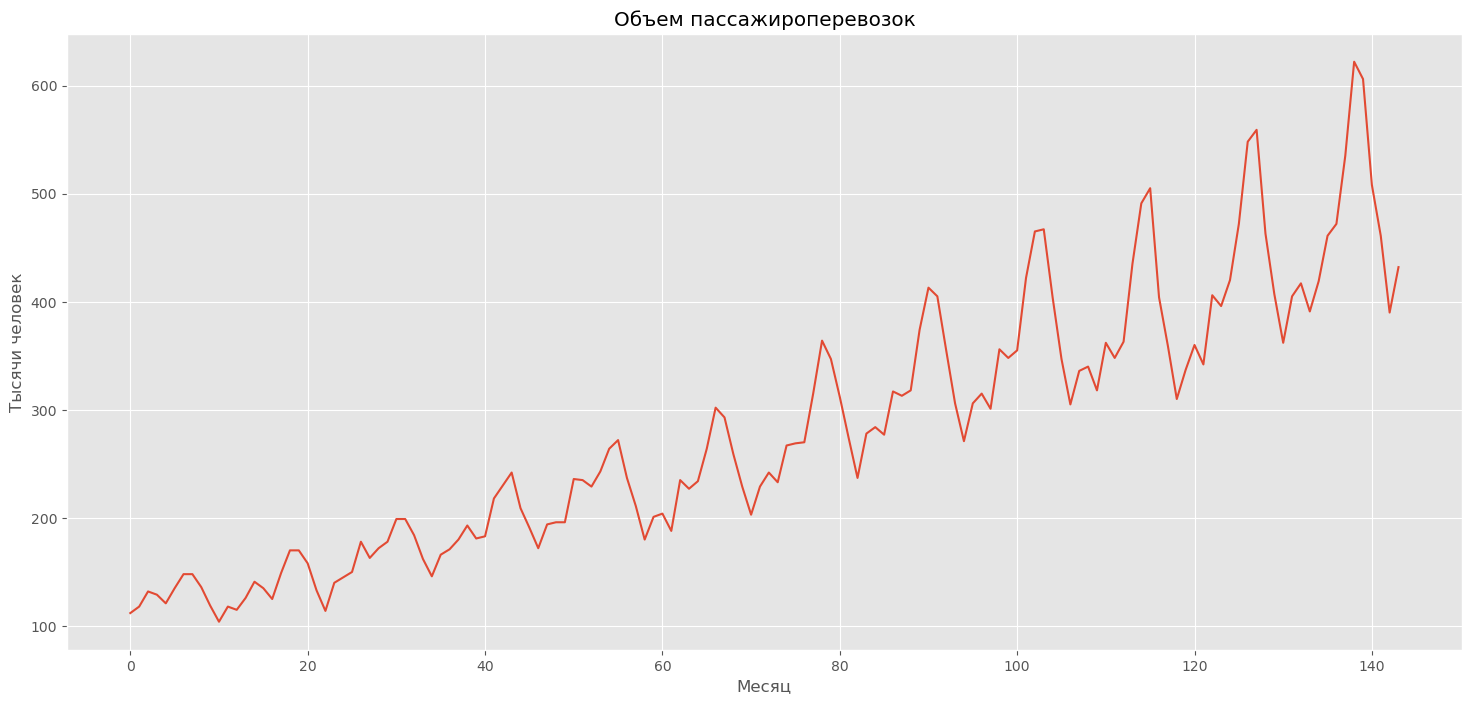

In [6]:
plt.figure(figsize=(18,8))
ts_data.plot()

plt.xlabel(u'Meсяц')
plt.ylabel(u'Тысячи человек')
plt.title(u'Объем пассажироперевозок')

plt.show()

Какой тип сезонности?

Если аддитивная, ничего не делаем, все хорошо и так.

Если сезонность мультипликативная, надо переходить к логарифмам.

Получить прогноз для логарифмов, затем вернуться к исходным значениям. 


In [7]:
lts = np.log10(ts_data)
lts

0      2.049218
1      2.071882
2      2.120574
3      2.110590
4      2.082785
         ...   
139    2.782473
140    2.705864
141    2.663701
142    2.591065
143    2.635484
Name: series_g, Length: 144, dtype: float64

Замечание. В auto-arima не встроено никаких инструментов перевода ряда с мультипликативной сезонностью к ряду с аддитивной сезонностью, поэтому самим надо логарифмировать. 

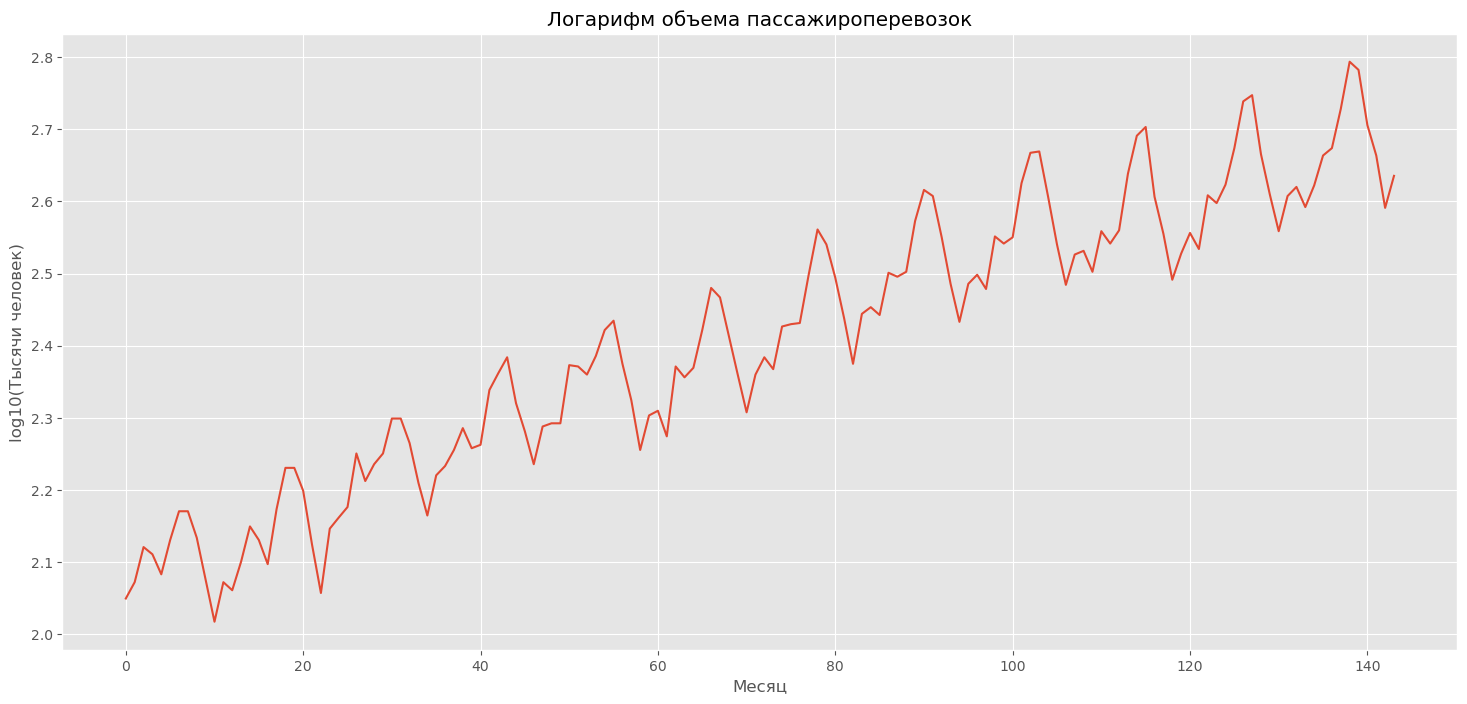

In [8]:
plt.figure(figsize=(18,8))
lts.plot()

plt.xlabel(u'Meсяц')
plt.ylabel(u'log10(Тысячи человек)')
plt.title(u'Логарифм объема пассажироперевозок')

plt.show()

Замечание. Теперь видим, что ряд не конус, не веер, а полоска, значит преобразование сработало нормально. Значит с рядом из логарифмов мы можем работать с помощью auto-arima

Какой период сезонных отклонений?

В auto-arima работает только с одной сезонностью. В prophet была возможность указать сезонность и годовую и недельную.

In [12]:
seas_period_ = 12

In [11]:
?pm.auto_arima

Signature:
pm.auto_arima(
    y,
    X=None,
    start_p=2,
    d=None,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    m=1,
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=True,
    error_action='trace',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    return_valid_fits=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept='auto',
    sarimax_kwargs=None,
    **fit_args,
)
Docstring:
Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal
parameters for an ``ARIMA`` model, settling o

In [16]:
lts

0      2.049218
1      2.071882
2      2.120574
3      2.110590
4      2.082785
         ...   
139    2.782473
140    2.705864
141    2.663701
142    2.591065
143    2.635484
Name: series_g, Length: 144, dtype: float64

In [29]:
model = pm.auto_arima(lts)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                 269.148
Date:                Fri, 06 Oct 2023   AIC                           -520.297
Time:                        14:04:05   BIC                           -493.631
Sample:                             0   HQIC                          -509.461
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.001      5.464      0.000       0.003       0.007
ar.L1          0.2725      0.148      1.836      0.066      -0.018       0.563
ar.L2         -0.3690      0.167     -2.205      0.027      -0.697      -0.041
ar.L3          0.4797      0.114      4.192      0.000       0.255       0.704
ar.L4         -0.4783      0.091     -5.241      0.000      -0.657      -0.299
ma.L1         -0.2981      0.215     -1.389      0.165      -0.719       0.122
ma.L2          0.0668      0.215      0.311      0.756      -0.354       0.488
ma.L3         -0.6557      0.188     -3.492      0.000      -1.024      -0.288
sigma2         0.0013      0.000      5.128      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 4.35
Prob(Q):                              0.59   Prob(JB):                         0.11
Heteroskedasticity (H):               1.23   Skew:                             0.12
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model2 = pm.auto_arima(lts, start_p=2, d=None, start_q=2, 
                      start_P=1, D=None, start_Q=1,
                      max_P=2, max_D=2, max_Q=2, max_order=8,
                      m=seas_period_, seasonal=True, 
                      stationary=False, information_criterion='aic',                       
                      out_of_sample_size=0, scoring='mse', scoring_args=None)

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 359.675
Date:                            Fri, 06 Oct 2023   AIC                           -709.350
Time:                                    14:04:34   BIC                           -694.936
Sample:                                         0   HQIC                          -703.492
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0047      0.003      1.618      0.106      -0.001       0.010
ar.L1          0.9077      0.055     16.483      0.000       0.800       1.016
ma.L1         -0.3331      0.101     -3.306      0.001      -0.531      -0.136
ma.S.L12      -0.5556      0.105     -5.276      0.000      -0.762      -0.349
sigma2         0.0002   2.61e-05      9.252      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.74
Prob(Q):                              0.83   Prob(JB):                         0.03
Heteroskedasticity (H):               0.58   Skew:                             0.05
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# model = pm.auto_arima(lts, start_p=2, d=None, start_q=2, 
#                       start_P=1, D=None, start_Q=1,
#                       max_P=2, max_D=2, max_Q=2, max_order=8,
#                       m=seas_period_, seasonal=True, 
#                       stationary=False, information_criterion='aic', 
#                       alpha=0.05, test='kpss', seasonal_test='ch',
#                       stepwise=True, n_jobs=1, start_params=None, 
#                       trend='c', method=None, transparams=True,
#                       solver='lbfgs', maxiter=50, 
#                       disp=0, callback=None, offset_test_args=None,
#                       seasonal_test_args=None, suppress_warnings=False,
#                       error_action='trace', trace=False, random=False,
#                       random_state=None, n_fits=10, return_valid_fits=False,
#                       out_of_sample_size=0, scoring='mse', scoring_args=None)
# внешние регрессоры сюда нельзя дописать  (инфо на лето 2021)

# y,
#     X=None,
#     start_p=2,
#     d=None,
#     start_q=2,
#     max_p=5,
#     max_d=2,
#     max_q=5,
#     start_P=1,
#     D=None,
#     start_Q=1,
#     max_P=2,
#     max_D=1,
#     max_Q=2,
#     max_order=5,
#     m=1,
#     seasonal=True,
#     stationary=False,
#     information_criterion='aic',
#     alpha=0.05,
#     test='kpss',
#     seasonal_test='ocsb',
#     stepwise=True,
#     n_jobs=1,
#     start_params=None,
#     trend=None,
#     method='lbfgs',
#     maxiter=50,
#     offset_test_args=None,
#     seasonal_test_args=None,
#     suppress_warnings=True,
#     error_action='trace',
#     trace=False,
#     random=False,
#     random_state=None,
#     n_fits=10,
#     return_valid_fits=False,
#     out_of_sample_size=0,
#     scoring='mse',
#     scoring_args=None,
#     with_intercept='auto',
#     sarimax_kwargs=None,

c:\Users\-\.conda\envs\stan_env\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,2)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\-\.conda\envs\stan_env\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\-\.conda\envs\stan_env\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\-\.conda\envs\stan_env\lib\site-packages\pmdarima\arima\arima.py", line 526, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "c:\Users\-\.conda\envs\stan_env\lib\site-packages\pmdarima\arima\arima.py", line 476, in _fit_wrapper
    raise ValueError("Expected non-None value for `method`")
ValueError: Expected non-None value for `method`

  warnings.warn(warning_str, ModelFitWarning)
c:\Users\-\.conda\env

ValueError: Could not successfully fit a viable ARIMA model to input data.
See http://alkaline-ml.com/pmdarima/no-successful-model.html for more information on why this can happen.

In [20]:
model.fit(lts)

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True)

In [33]:
model2.fit(lts)

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [22]:
# на сколько месяцев желаем прогнозировать?
horizon_ = 12

In [23]:
# Прогноз для логарифмов
forecast = model.predict(n_periods=horizon_)
forecast

144    2.693750
145    2.717125
146    2.747057
147    2.758084
148    2.738180
149    2.736656
150    2.739350
151    2.730615
152    2.740821
153    2.753637
154    2.752676
155    2.761550
dtype: float64

In [34]:
# Прогноз для логарифмов
forecast2 = model2.predict(n_periods=horizon_)
forecast2

144    2.656012
145    2.633234
146    2.685989
147    2.699471
148    2.715223
149    2.775548
150    2.836803
151    2.835860
152    2.759326
153    2.709906
154    2.647417
155    2.693470
dtype: float64

Это ответ, версиия ARIMA
Спрогнозированные значения для исходного ряда

In [25]:
res = 10**forecast
res

144    494.026011
145    521.344528
146    558.543513
147    572.907236
148    547.243036
149    545.326072
150    548.718707
151    537.792818
152    550.580339
153    567.070372
154    565.817629
155    577.497392
dtype: float64

In [35]:
res2 = 10**forecast2
res2

144    452.910005
145    429.768371
146    485.276631
147    500.577616
148    519.066696
149    596.414882
150    686.756674
151    685.266872
152    574.548086
153    512.750543
154    444.034674
155    493.707293
dtype: float64

In [26]:
# Номера месяцев, для которых делается прогноз
valid = range(145,157,1)

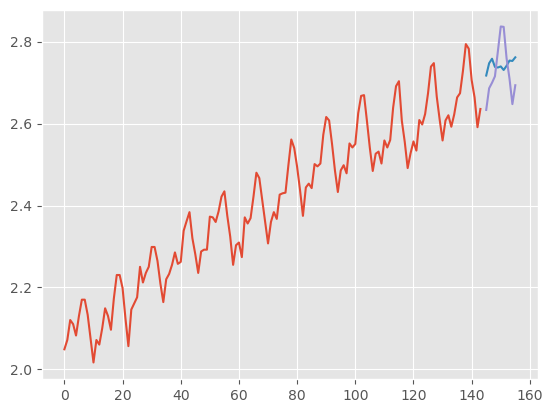

In [37]:
# Проверяем качество прогноза для Логарифмов
# Строим графики

forecast1_df = pd.DataFrame(forecast, index=valid, columns=['Prediction'])
forecast2_df = pd.DataFrame(forecast2, index=valid, columns=['Prediction'])
plt.plot(lts, label='Train')
plt.plot(forecast1_df, label='Prediction')
plt.plot(forecast2_df, label='Prediction')
plt.show()

По прогнозу логарифмов вычисляем прогноз для исходного ряда

Проверяем качество прогноза для исходного ряда

Строим графики

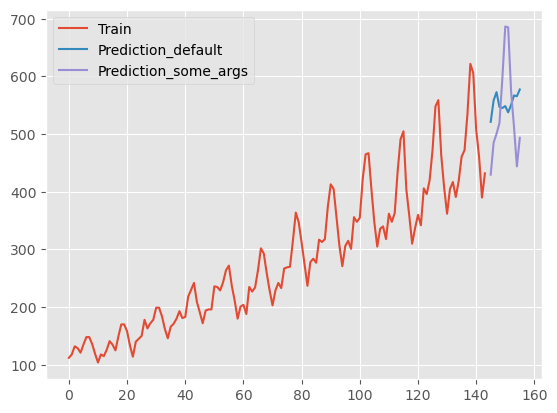

In [39]:
plt.plot(10**lts, label='Train')
plt.plot(10**forecast1_df, label='Prediction_default')
plt.plot(10**forecast2_df, label='Prediction_some_args')

plt.legend(loc='best')
plt.show()